In [2]:
from PIL import Image
import torch
import numpy as np
import cv2
import albumentations as A
from torch.utils.data import Dataset
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import os.path as osp
import math
import json
import matplotlib.pyplot as plt

In [13]:
# dataset 지정 및 idx 
# '/data/ephemeral/home/data/vietnamese_receipt'
# '/data/ephemeral/home/data/japanese_receipt'
# '/data/ephemeral/home/data/thai_receipt'
# '/data/ephemeral/home/data/chinese_receipt'


dataset_dir = '/data/ephemeral/home/data/vietnamese_receipt'

# 알고 싶은 이미지를 정한다.

img_name='extractor.vi.in_house.appen_000044_page0001.jpg' 
ufo_fpath=osp.join(dataset_dir,'ufo/train.json')

with open(ufo_fpath,'r') as f:
    ufo_anno=json.load(f)

In [14]:
sample_ids=sorted(ufo_anno['images'])
img_idx=sample_ids.index(img_name)
print(sample_ids[img_idx])

extractor.vi.in_house.appen_000044_page0001.jpg


In [15]:
first_sample_id=sample_ids[img_idx]
print(len(ufo_anno['images'][first_sample_id]['words']))
print(ufo_anno['images'][first_sample_id]['words'])

112
{'0001': {'transcription': 'Cú', 'points': [[100.661905, 113.088704], [133.936474, 122.21521], [134.05219, 146.476753], [100.793466, 139.269458]]}, '0002': {'transcription': 'trên', 'points': [[143.287857, 122.955822], [193.149695, 134.533241], [192.561885, 160.06502], [142.322364, 148.204251]]}, '0003': {'transcription': 'cây', 'points': [[200.385582, 136.638226], [242.485287, 147.689399], [241.95972, 176.269881], [199.584635, 165.570196]]}, '0004': {'transcription': 'Garden', 'points': [[248.67924, 150.826404], [339.459094, 158.450217], [339.374389, 181.378129], [248.961603, 174.686116]]}, '0005': {'transcription': 'ー', 'points': [[348.561436, 168.48374], [357.738249, 168.48374], [357.738249, 173.227447], [348.561436, 173.227447]]}, '0006': {'transcription': 'Coffee', 'points': [[366.06797, 156.737429], [454.730098, 156.737429], [454.730098, 180.484191], [366.06797, 180.484191]]}, '0007': {'transcription': 'Kiêm', 'points': [[187.886882, 169.818442], [235.327378, 181.925758], [23

In [16]:
sample_id=sample_ids[img_idx]
img_fpath=osp.join(dataset_dir,'img/train',sample_id)
print(img_fpath)

/data/ephemeral/home/data/vietnamese_receipt/img/train/extractor.vi.in_house.appen_000044_page0001.jpg


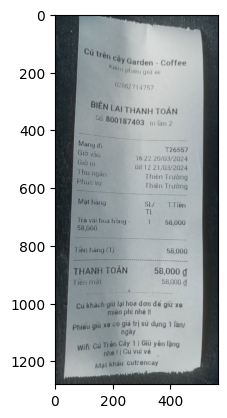

In [17]:
image=cv2.imread(img_fpath)
plt.imshow(image)

In [18]:
bboxes=[]
for word_info in ufo_anno['images'][sample_id]['words'].values():
    if len(word_info['points'])>4:
        continue

    bboxes.append(np.array(word_info['points']))
bboxes=np.array(bboxes,dtype=np.float32)

(-0.5, 563.5, 1279.5, -0.5)

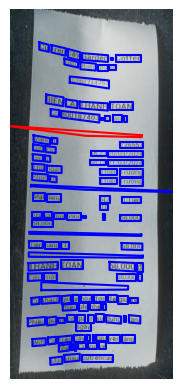

In [19]:
# 특정 박스가 어디에 위치해 있는지 알고 싶을 때
# 박스중에 몇 번째 박스가 어디에 위치해 있는지 알고 싶을 때
box_idx=21
ax=None
ax = ax or plt
for i,word in enumerate(bboxes):
    if i==box_idx:
        ax.plot(np.append(word[:,0],word[0,0]),np.append(word[:,1],word[0,1]), color="red")
    else:
        ax.plot(np.append(word[:,0],word[0,0]),np.append(word[:,1],word[0,1]), color="blue")
ax.imshow(image)
ax.axis("off")
